## Scrapper

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

indices = {
    'nameIndex': 0,
    'price' : 1,
    'discountPrice' : 2,
    'review' : 3,
    'numberOfPositiveReviews' : 4,
    'numberOfAllReviews' : 5,
    'tag1' : 6,
    'tag2' : 7,
    'tag3' : 8
    }

    review  numberOfPositiveReviews  numberOfAllReviews
0       30                       33                 121
1       13                       30                 239
2       19                       46                 248
3       33                       78                 251
4        6                       15                 267
..     ...                      ...                 ...
83      85                  2813583             3310325
84      56                  2208052             3943014
85      87                  3663070             4210680
86      97                  4598142             4740509
87      88                  7840521             8909935

[88 rows x 3 columns]


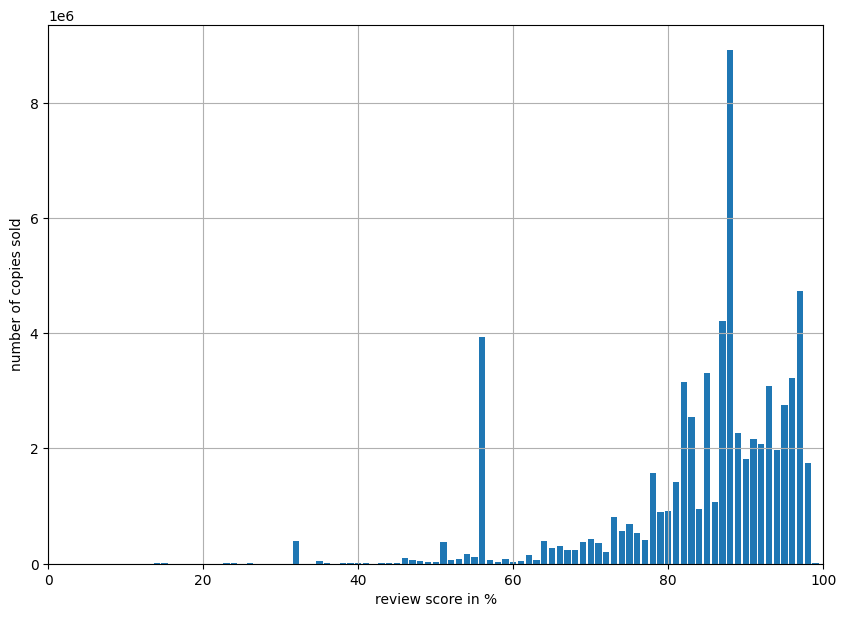

In [91]:
df = pd.read_csv('gamesInfo.csv')

df = df.groupby('review').sum('numberOfAllReviews').sort_values('numberOfAllReviews',ascending=True)
df = df.reset_index(level=0)
print(df)

fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlabel('review score in %')
ax.set_ylabel('number of copies sold')
ax.set_xlim(0,100)
ax.bar(df['review'], df['numberOfAllReviews'])
ax.grid('both')

    review  count
0        0    314
1        6      1
2       13      1
3       14      3
4       15      3
..     ...    ...
83      96    123
84      97     99
85      98     41
86      99      8
87     100     54

[88 rows x 2 columns]


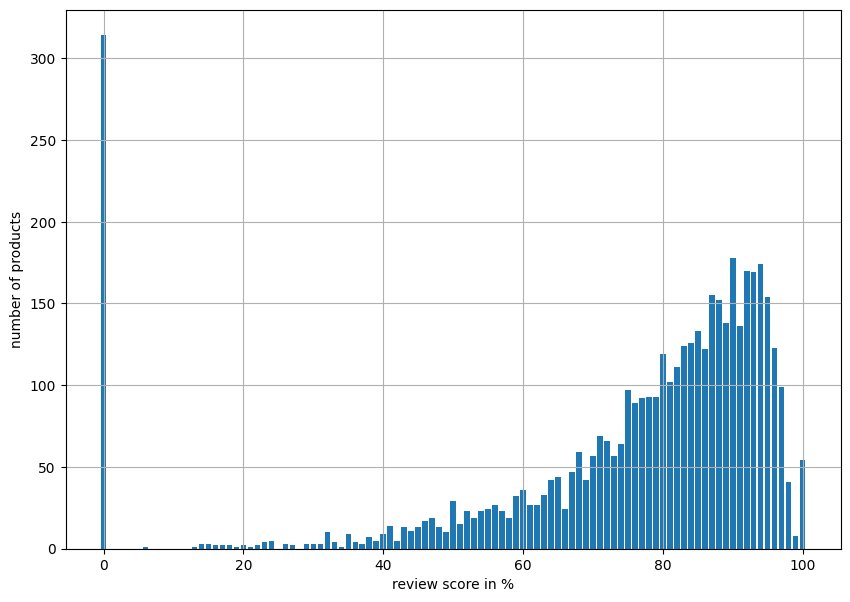

In [115]:
df = pd.read_csv('gamesInfo.csv')

df = df.groupby('review').count().aggregate('title')
df = df.reset_index(level=0)
df = df.rename(columns={ 'title': 'count'}).sort_values('review')
print(df)

fig, ax = plt.subplots(figsize=(10,7))

# ax.set_xticklabels(df['review'], rotation='vertical')
ax.set_xlabel('review score in %')
ax.set_ylabel('number of products')
ax.bar(df['review'], df['count'])
ax.grid('both')

                    title     sum
11                 Action  2886.0
16              Adventure  1022.0
221                   RPG   723.0
135                 Indie   699.0
268              Strategy   422.0
..                    ...     ...
72                   Cute    18.0
81            Destruction    18.0
211  Precision Platformer    18.0
23               Assassin    17.0
89        Dungeon Crawler    17.0

[100 rows x 2 columns]


/tmp/ipykernel_475/3143026861.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['title'], rotation='vertical')


<BarContainer object of 100 artists>

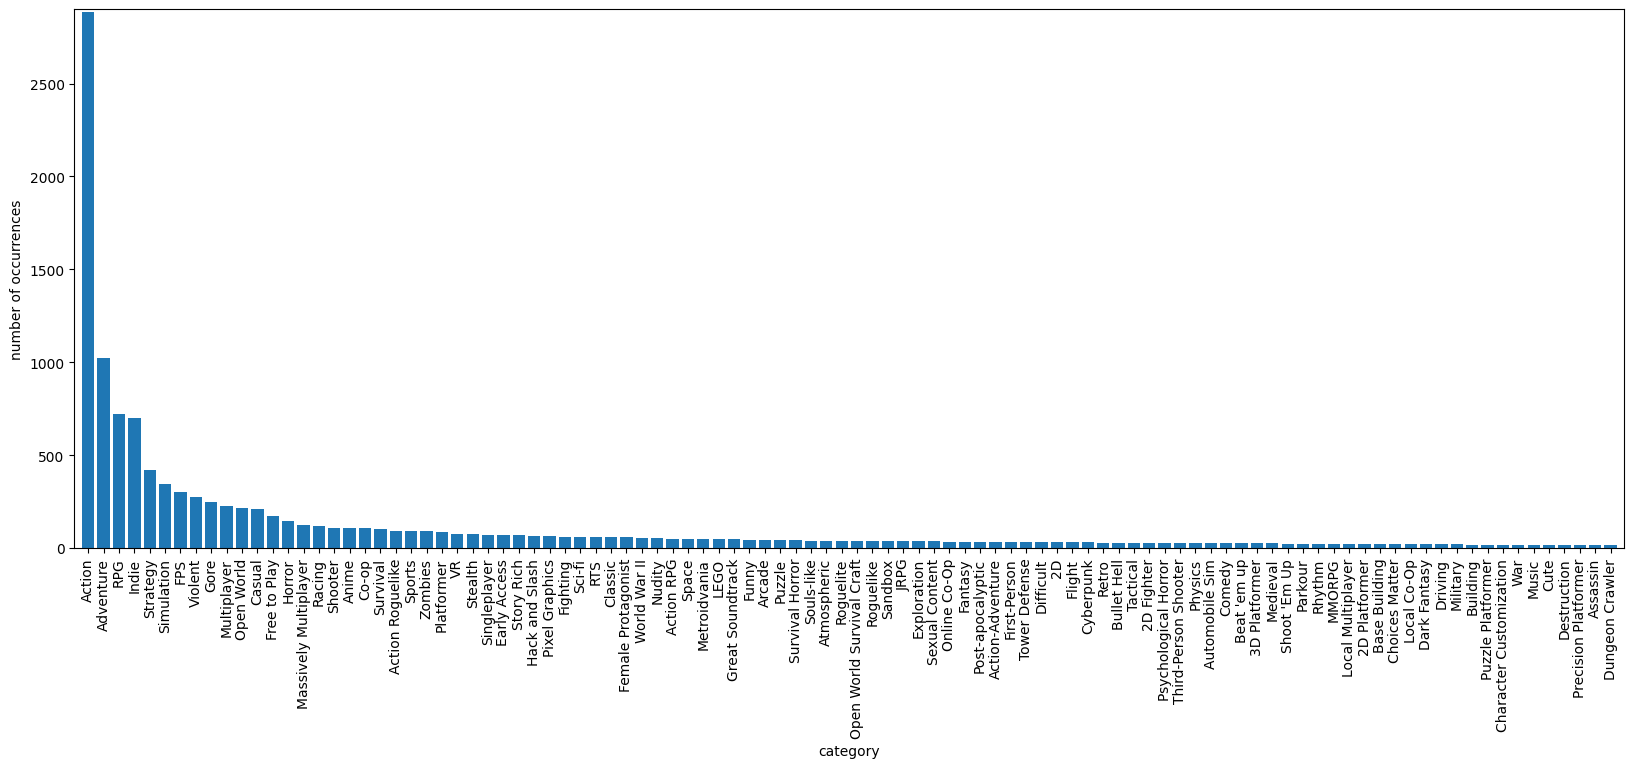

In [77]:
names = ['title','price','discountPrice','review','numberOfPositiveReviews','numberOfAllReviews','tag1','tag2','tag3']
dfGamesInfo = pd.read_csv('gamesInfo.csv',header=1,sep=',', names=names)
tagCounter = dfGamesInfo.groupby('tag1').size().add(dfGamesInfo.groupby('tag2').size(),fill_value=0).add(dfGamesInfo.groupby('tag3').size(),fill_value=0)

data = tagCounter.reset_index(level=0)
data = data.rename(columns={'index': 'title', 0: 'sum'})
data = data.sort_values('sum',ascending=False)
data = data.head(n=100)
print(data)
fig, ax = plt.subplots(figsize=(20,7))

ax.margins(0.005)
ax.set_xticklabels(data['title'], rotation='vertical')
ax.set_xlabel('category')
ax.set_ylabel('number of occurrences')
ax.bar(data['title'], data['sum'])
